### Libraries used:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset:

In [2]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

### Dropping features that are not required

In [5]:
drop_features = ['encounter_id', 'patient_nbr', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [6]:
df.drop(drop_features, axis=1, inplace=True)
df.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,1,41,0,1,0,0,0,1,None,None,No,No,NO
1,Caucasian,Female,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30
2,AfricanAmerican,Female,2,11,5,13,2,0,1,6,None,None,No,Yes,NO
3,Caucasian,Male,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO
4,Caucasian,Male,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO


In [7]:
df.shape

(101766, 15)

### Cleaning the dataset

In [8]:
print("Checking the No. of question marks in each cols :")
df[df == '?'].count(axis=0)

Checking the No. of question marks in each cols :


C:\Users\Dharmil\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


race                  2273
gender                   0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
number_diagnoses         0
max_glu_serum            0
A1Cresult                0
change                   0
diabetesMed              0
readmitted               0
dtype: int64

In [9]:
# Repalcing the ? marks in the dataset to Nan values
df.replace('?', np.nan, inplace= True)
df.isnull().sum()

race                  2273
gender                   0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
number_diagnoses         0
max_glu_serum            0
A1Cresult                0
change                   0
diabetesMed              0
readmitted               0
dtype: int64

In [10]:
# Since the race column is the categorical imputing it with the Mode value

mode = df['race'].mode()
print('Mode of the feature race',mode)
df['race'].fillna(mode[0],inplace = True) 
print('Number of null values in race',df['race'].isnull().sum())

Mode of the feature race 0    Caucasian
dtype: object
Number of null values in race 0


### Converting Categorical Data

In [11]:
df = pd.get_dummies(df, prefix = ['race', 'gender', 'glucose_serum_test', 'A1Cresult', 'changeMeds', 'diabetesMed',
                                 'readmitted'], 
                    columns = ['race', 'gender', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted'])

# Race
#df=pd.get_dummies(df['race'], prefix = 'race')

# Gender
#df=pd.get_dummies(df['gender'], prefix = 'gender')

# Glucose serum test result 
#df=pd.get_dummies(df['max_glu_serum'], prefix = 'glucose_serum_test')

# A1c test result
#df=pd.get_dummies(df['A1Cresult'], prefix = 'A1Cresult')

# Change of medications
#df=pd.get_dummies(df['change'], prefix = 'changeMeds')

# Diabetes medications
#df=pd.get_dummies(df['diabetesMed'], prefix = 'diabetesMed')

# Readmitted
#df=pd.get_dummies(df['readmitted'], prefix = 'readmitted')


In [12]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,changeMeds_Ch,changeMeds_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,1,41,0,1,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
1,3,59,0,18,0,0,0,9,0,0,...,0,1,0,1,0,0,1,0,1,0
2,2,11,5,13,2,0,1,6,1,0,...,0,1,0,0,1,0,1,0,0,1
3,2,44,1,16,0,0,0,7,0,0,...,0,1,0,1,0,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,...,0,1,0,1,0,0,1,0,0,1


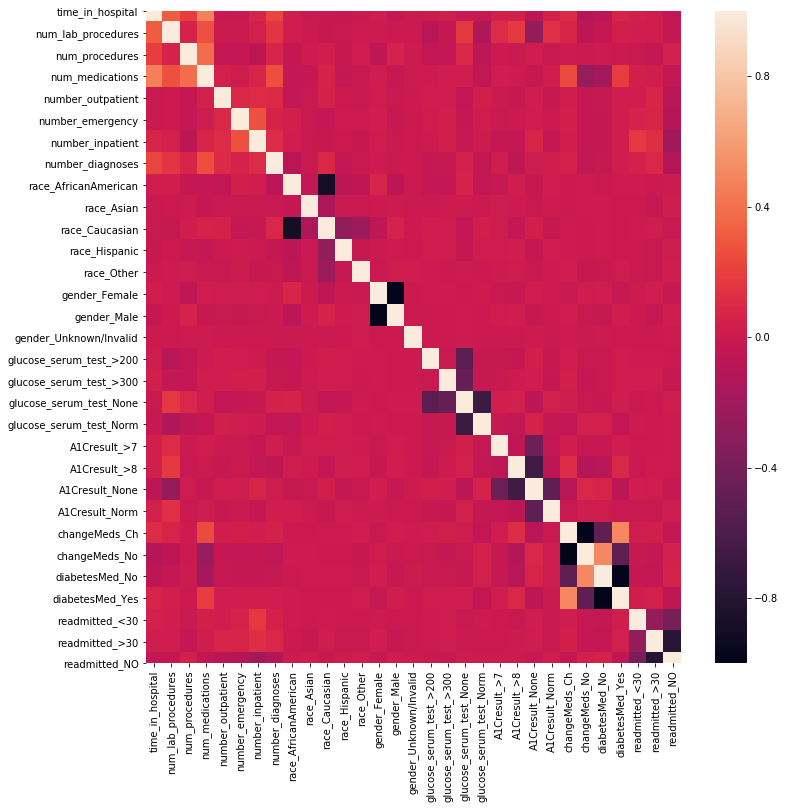

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

### VIF

In [14]:
#gather features
df_features = df[['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'glucose_serum_test_>200', 'glucose_serum_test_>300',
       'glucose_serum_test_None', 'glucose_serum_test_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'changeMeds_Ch',
       'changeMeds_No', 'diabetesMed_No', 'diabetesMed_Yes', 'readmitted_<30',
       'readmitted_>30', 'readmitted_NO']]

from patsy import dmatrices
# get y and X dataframes based on this regression:
y, X = dmatrices('time_in_hospital ~ + df_features', df, return_type='dataframe')

In [15]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\Dharmil\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Dharmil\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [16]:
vif.round(1)

,VIF Factor,features
0,0.0,Intercept
1,1.2,df_features[0]
2,1.2,df_features[1]
3,1.5,df_features[2]
4,1.0,df_features[3]
5,1.1,df_features[4]
6,1.2,df_features[5]
7,1.1,df_features[6]
8,inf,df_features[7]
9,inf,df_features[8]


### Model Building

In [17]:
import statsmodels.api as sm

In [18]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'glucose_serum_test_>200', 'glucose_serum_test_>300',
       'glucose_serum_test_None', 'glucose_serum_test_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'changeMeds_Ch',
       'changeMeds_No', 'diabetesMed_No', 'diabetesMed_Yes', 'readmitted_<30',
       'readmitted_>30', 'readmitted_NO'],
      dtype='object')

In [19]:
X = df[['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'glucose_serum_test_>200', 'glucose_serum_test_>300',
       'glucose_serum_test_None', 'glucose_serum_test_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'changeMeds_Ch',
       'changeMeds_No', 'diabetesMed_No', 'diabetesMed_Yes', 'readmitted_<30',
       'readmitted_>30', 'readmitted_NO']]

Y = df['time_in_hospital']

In [20]:
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

C:\Users\Dharmil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       time_in_hospital   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1679.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        20:13:44   Log-Likelihood:            -2.3933e+05
No. Observations:              101766   AIC:                         4.787e+05
Df Residuals:                  101742   BIC:                         4.789e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We remove the variable with a p-value > 0.05

In [22]:
X = df[['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Caucasian', 
       'glucose_serum_test_>200', 'glucose_serum_test_>300',
       'glucose_serum_test_None','readmitted_<30',
        ]]

Y = df['time_in_hospital']

In [23]:
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()

In [24]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       time_in_hospital   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2956.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        20:13:45   Log-Likelihood:            -2.3939e+05
No. Observations:              101766   AIC:                         4.788e+05
Df Residuals:                  101752   BIC:                         4.789e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Using Scikit Learn

In [25]:
X = df[['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Caucasian', 
       'glucose_serum_test_>200', 'glucose_serum_test_>300',
       'glucose_serum_test_None','readmitted_<30',
        ]]

y = df['time_in_hospital']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [27]:
X_train.shape, y_train.shape

((81412, 13), (81412,))

In [28]:
X_test.shape, y_test.shape

((20354, 13), (20354,))

In [29]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print("Intercept: ",lr1.intercept_)
print("Coefficients: ",lr1.coef_)

Intercept:  0.19628142522972514
Coefficients:  [ 0.03174689  0.06427787  0.13617044 -0.08600704 -0.10592305  0.10005136
  0.14375469  0.18599593 -0.08429423  0.41143168  0.64535519 -0.54801915
  0.1827966 ]


In [31]:
pred_lr = lr1.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE: ",mean_squared_error(y_test,pred_lr))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_lr)))
print("R-square: ",r2_score(y_test,pred_lr))

MSE:  6.559724627424802
RMSE:  2.5611959369452393
R-square:  0.27144115642056266


### Random Forests

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rm_model1 = RandomForestRegressor(random_state = 10)
rm_model1.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [35]:
rm_pred1 = rm_model1.predict(X_test)

In [36]:
print("MSE: ",mean_squared_error(y_test,rm_pred1))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,rm_pred1)))
print("R-square: ",r2_score(y_test,rm_pred1))

MSE:  7.805303912818967
RMSE:  2.793797400102407
R-square:  0.13310031815437917
